### Kagome lattice

In [1]:
import numpy as np
import numpy.linalg as lng
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
l_cell = 20
n_cell = l_cell**2
n_sites = 3*n_cell
hopping = 1.0 

In [3]:
### class to define the hamiltonian
class lattice:
    def __init__(self,l_cell,n_cell,hopping,n_sites):
        '''
        This function will initialize the object and set the
        parameters:
        parameters:
            self(object): object
            l_cell(int):  number of unit cell
            n_cell(int): total number of unit cells
            hopping(float): nn nearest neighbour hopping
        '''
        self.l_cell = l_cell
        self.n_cell = n_cell
        self.hopping = hopping
        self.n_sites = n_sites
    
    ## this function will create the square lattice for 
    ## the unit cells
    def neighbour(self):
        '''
        This function will create the neighbour table with
        periodic boundary conditions
        parameters:
            None
        return:
            None
        '''
        sip = lambda x:(x+1)%self.l_cell
        sim = lambda x:(x-1+self.l_cell)%self.l_cell
        ri , li , ui , di,rui,dli = [],[],[],[],[],[]
        for j in range(n_cell):
            yi,xi = divmod(j,self.l_cell)
            ri.append(sip(xi)+yi*self.l_cell)
            li.append(sim(xi)+yi*self.l_cell)
            ui.append(xi+sip(yi)*self.l_cell)
            di.append(xi+sim(yi)*self.l_cell)
            rui.append(sip(xi)+sip(yi)*self.l_cell)
            dli.append(sim(xi)+sim(yi)*self.l_cell)
        self.right = np.array(ri,dtype='int')
        self.left = np.array(li,dtype='int')
        self.up = np.array(ui,dtype='int')
        self.down = np.array(di,dtype='int')
        self.right_up = np.array(rui,dtype='int')
        self.left_down = np.array(dli,dtype='int')


In [4]:
## defining the class for the hamiltonian 
## it uses lattice as the parent class
class Hamiltonian(lattice):
    ## initializing the object
    def __init(self,l_cell,n_cell,hopping,n_sites):
        
        ## using init of the parent class
        super(Hamiltonian,self).__init__(l_cell,n_cell,hopping,n_sites)
        

    ## construct the hamiltonian matrix
    def hamunitcell(self):
        '''
        This function will initialize the elements of the matrix only within the unit cell.
        Hopping outside the unit cells is not allowed
        0-->1, 0-->2, 1-->0,1--->2, 2--->0, 2-->1
        parameters:
            self(object): An instance of the class
        return :
            hammat(matrix): the incomplete hamiltonian matrix
        '''
        hammat = np.zeros((self.n_sites,self.n_sites))

        for i in range(self.n_cell):
            #ri, li, ui, di = self.right[i], self.left[i], self.up[i], self.down[i]
            #rui,ldi = self.right_up[i],self.left_down[i]
            
            ## setting the bonds inside the unit cell
            hammat[3*i,(3*i)+1] = -self.hopping
            hammat[3*i, (3*i)+2] = -self.hopping

            hammat[(3*i)+1,3*i] = -self.hopping
            hammat[(3*i)+1,(3*i)+2] = -self.hopping

            hammat[(3*i)+2, 3*i] = -self.hopping
            hammat[(3*i)+2, (3*i)+1] = -self.hopping

        return hammat

    ### initialize hopping outside the unit cells
    def hamOutUnitCell(self,hammat):
        '''
        This function will initialize hopping outside the unit cells
        parameters:
            self(object): Instance of the class
        return:
            None
        '''
        for i in range(self.n_cell):
            ## sites in a given unit cell
            s0,s1,s2 = 3*i,(3*i)+1,(3*i)+2

            ### right,left,up,down neighbours of the unitcell
            ri, li, ui, di = self.right[i], self.left[i], self.up[i], self.down[i]
            
            ## allowed neighbours of the site 0 of the unit cell
            s0l = 3*li+1; s0ld = 3*self.left_down[i]+2

            ## allowed neighbours of the site 1 of the unit cell
            s1r = 3*ri; s1d = 3*di+2
            
            ## allowed neighbours of the site 2 of the unit cell
            s2u = 3*ui+1; s2ur = 3*self.right_up[i]

            ### setting up the bonds outside the unitcell
            ## for the 1st site in the unitcell

            hammat[s0,s0l] = -self.hopping
            hammat[s0l,s0] = -self.hopping

            hammat[s0,s0ld] = -self.hopping
            hammat[s0ld,s0] = -self.hopping

            ## for the 2nd site in the unit cell
            hammat[s1,s1r] = -self.hopping
            hammat[s1r,s1] = -self.hopping

            hammat[s1,s1d] = -self.hopping
            hammat[s1d,s1] = -self.hopping

            ## for the 3rd site in the unit cell
            hammat[s2,s2u] = -self.hopping
            hammat[s2u,s2] = -self.hopping

            hammat[s2,s2ur] = -self.hopping
            hammat[s2ur,s2] = -self.hopping

        self.ham = hammat

    ### write the full hamiltonian
    def haminit(self):
        '''
        This function will construct the full hamiltonian in two steps:
        1. In first step it will sep up the hamiltonian for sites in the unit cell
        2. In the second step the hopping outside the unit cell will be set up.
        parameters:
            self(object): The class instance
        return:
            None
        '''
        mat = self.hamunitcell()
        self.hamOutUnitCell(mat)

    ### diagonalize the hamiltonian
    def diag(self):
        '''
        This function will diagonalize the hamiltonian
        parameters:
            self(object): Instance of the class
        return:
            evals (float): Eigenvalues of the hamiltonian
            evecs(float): eigenvectors of the hamiltonian
        '''
        evals,evecs = lng.eigh(self.ham)
        return evals,evecs



In [5]:
for i in range(n_cell):
    s0 = 3*i;s1 = (3*i)+1;s2 = (3*i)+2
    
    ri,li,ui,di = ham.right[i],ham.left[i],ham.up[i],ham.down[i]
    s0l = 3*li+1 
    s0ld = 3*ham.left_down[i]+2 
    s1r = 3*ri
    s1d = 3*di+2
    s2u = 3*ui+1
    s2ur = 3*ham.right_up[i]
    #print(f'site-0: {s0} site-1: {s1} site-2: {s2}')
    #print(f'ri: {ri} li: {li} di: {di} ui: {ui}')
    
    print(f'unitcell:{i} site:{3*i} li: {s0l} ldi:{s0ld}')
    #print(f'unitcell:{i} site:{3*i+1} ri: {s1r} di:{s1d}')
    #print(f'unitcell:{i} site:{3*i+2} ui: {s2u} rui:{s2ur}')


NameError: name 'ham' is not defined

In [5]:
### create an instance of the class
ham = Hamiltonian(l_cell,n_cell,hopping,n_sites)

## set up the neighbour table
ham.neighbour()



## initialize the hamiltonian
ham.haminit()


## diagonalize the hamiltonian
envls,evecs = ham.diag()

In [6]:
exct_result = np.loadtxt('Eigval_kagome_tb.dat',delimiter='\t')
mc_r = pd.read_csv('evali.dat', sep='\t',header=None)
mc_r.columns = ['data']
evls = []
for j in mc_r.data.str.split():
    evls.append(j[1])
print(len(evls))

df = pd.DataFrame({'data':np.hstack([envls,exct_result,np.array(evls)])})
df.loc[0:1200,'results'] = 'my_calc'
df.loc[1200:2400,'results']='your_calc'
df.loc[2400:,'results'] = 'mc_calc'

2400


In [67]:
df.data = df.data.astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     6000 non-null   float64
 1   results  6000 non-null   object 
dtypes: float64(1), object(1)
memory usage: 93.9+ KB


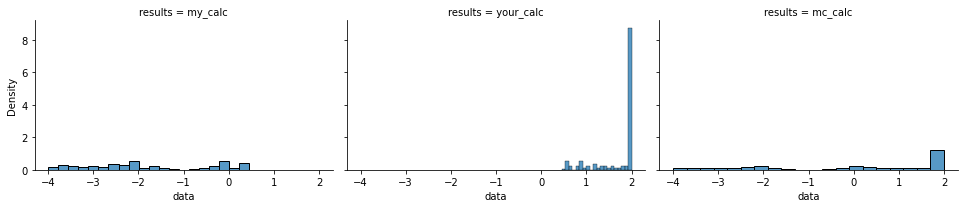

In [62]:
g = sns.FacetGrid(data=df,col='results',height=3,aspect=1.5)
g.map_dataframe(sns.histplot,'data',fill=True,bins=20,stat='density')
plt.show()


<AxesSubplot:xlabel='data', ylabel='Density'>

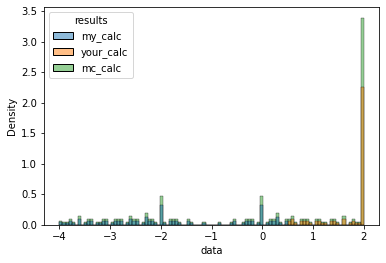

In [63]:
sns.histplot(x='data',data=df,hue='results',stat='density',bins=100)

<AxesSubplot:xlabel='data', ylabel='Density'>

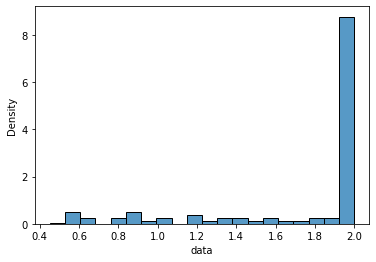

In [68]:
sns.histplot(df.loc[df.results=='your_calc','data'],stat='density')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


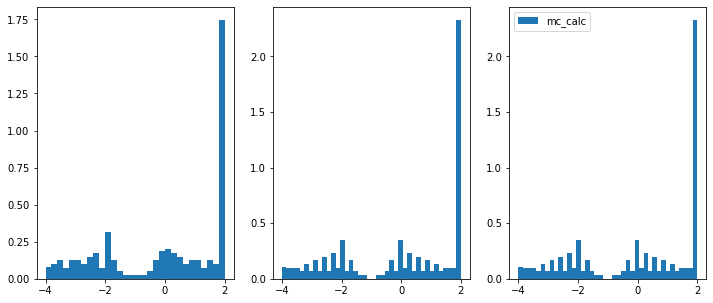

In [7]:
f,ax=plt.subplots(1,3,figsize=(12,5))
ax[0].hist(exct_result,bins=30,density=1,label='yourcalc')
plt.legend()
ax[1].hist(np.array(evls,dtype='float'), bins=40, density=1,label='mc_calc')
plt.legend()
ax[2].hist(np.array(envls, dtype='float'), bins=40, density=1, label='mc_calc')
plt.legend()
plt.show()

In [10]:
np.isclose(exct_result,envls).sum()

1200